# 감성 분석

In [14]:
import pandas as pd
from collections import Counter

# CSV 파일 로드
data = pd.read_csv('/Users/eunseo/Documents/semi_project/data/emotion_output_2023_view1_ver.1.csv')

# 감성 열의 각 행을 단어 리스트로 변환
word_list = [word.replace(',', '').split() for word in data['감성']]

# 단어 빈도수 계산
word_frequency = Counter([word for sublist in word_list for word in sublist])

# 데이터프레임 생성
df = pd.DataFrame(list(word_frequency.items()), columns=['단어', '빈도수'])

# 빈도수 열을 기준으로 내림차순 정렬
df = df.sort_values('빈도수', ascending=False)

# CSV 파일로 저장
df.to_csv('/Users/eunseo/Documents/semi_project/data/word_frequency_output.csv', index=False)

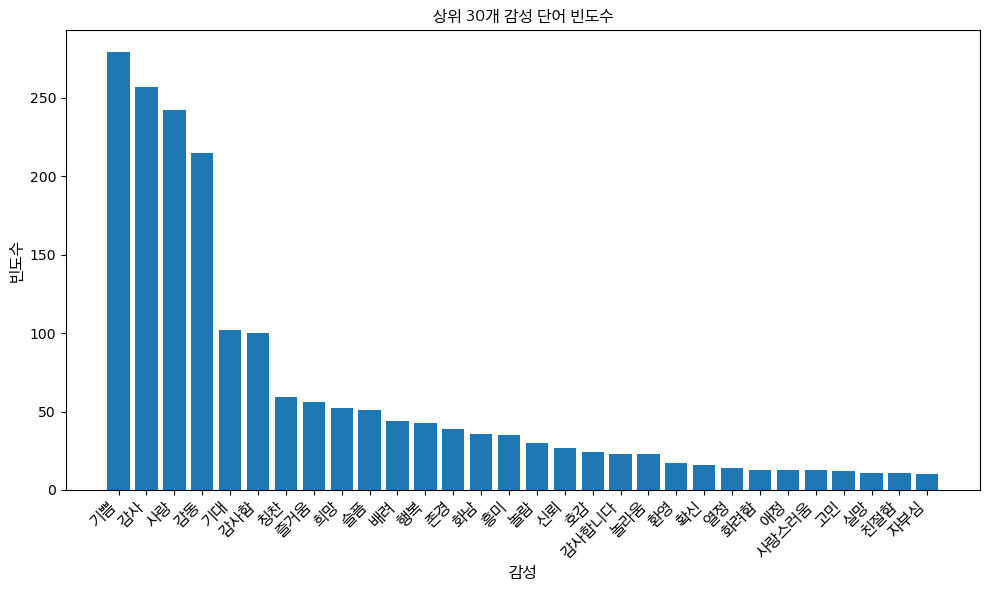

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 경로 설정 (본인의 환경에 맞게 수정)
font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'

# 한글 폰트 설정
fontprop = fm.FontProperties(fname=font_path, size=12)

# CSV 파일 로드
data = pd.read_csv('/Users/eunseo/Documents/semi_project/data/word_frequency_output.csv')

# 상위 30개 단어 추출
top_30_words = data['단어'].head(30)
top_30_frequencies = data['빈도수'].head(30)

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(top_30_words, top_30_frequencies)
plt.xlabel('감성', fontproperties=fontprop)
plt.ylabel('빈도수', fontproperties=fontprop)
plt.title('상위 30개 감성 단어 빈도수', fontproperties=fontprop)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)
plt.tight_layout()  # 그래프 요소들 간의 간격 조정
plt.show()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from gensim.models import Word2Vec
from sklearn.cluster import KMeans

# 폰트 경로 설정 (본인의 환경에 맞게 수정)
font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'

# 한글 폰트 설정
fontprop = fm.FontProperties(fname=font_path, size=12)

# CSV 파일 로드
data = pd.read_csv('/Users/eunseo/Documents/semi_project/data/word_frequency_output.csv')

# 상위 30개 단어 추출
상위_30개_단어 = data['단어'].head(30)

# Word2Vec 모델 학습
sentences = [단어.split() for 단어 in 상위_30개_단어]
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# 단어 벡터 추출
단어_벡터 = model.wv[상위_30개_단어]

# K-means 클러스터링
k = 5  # 클러스터 개수
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(단어_벡터)

# 클러스터링 결과 확인
clusters = kmeans.labels_

# 클러스터링 결과 출력
for i in range(k):
    cluster_words = [word for idx, word in enumerate(상위_30개_단어) if clusters[idx] == i]
    print(f"Cluster {i}: {cluster_words}")


Cluster 0: ['감사', '즐거움', '고민', '친절함']
Cluster 1: ['희망', '놀람', '놀라움', '실망', '자부심']
Cluster 2: ['기쁨', '감동', '감사함', '행복', '존경', '환영', '확신', '열정', '애정', '사랑스러움']
Cluster 3: ['칭찬', '슬픔', '배려', '흥미', '신뢰', '호감', '감사합니다', '화려함']
Cluster 4: ['사랑', '기대', '화남']


/Users/eunseo/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/Users/eunseo/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


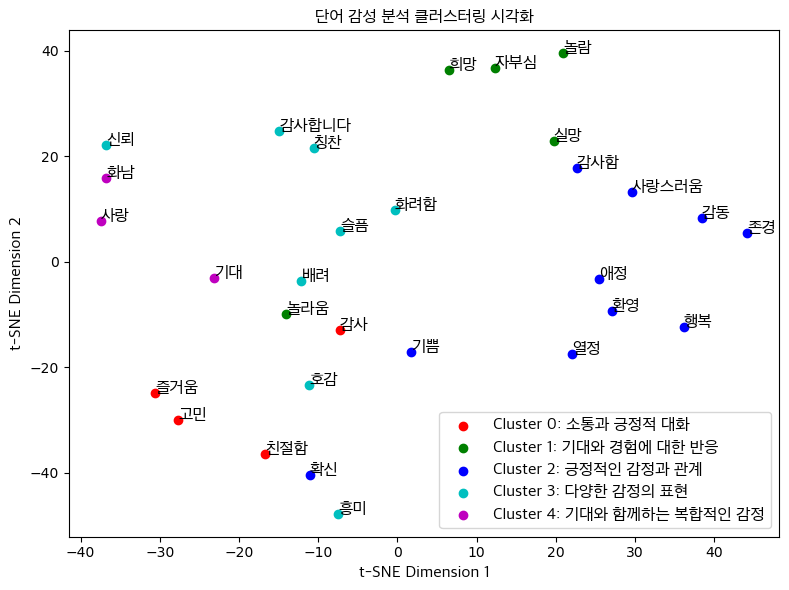

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# 폰트 경로 설정 (본인의 환경에 맞게 수정)
font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'

# 한글 폰트 설정
fontprop = fm.FontProperties(fname=font_path, size=12)

# CSV 파일 로드
data = pd.read_csv('/Users/eunseo/Documents/semi_project/data/word_frequency_output.csv')

# 상위 30개 단어 추출
상위_30개_단어 = data['단어'].head(30)

# Word2Vec 모델 학습
sentences = [단어.split() for 단어 in 상위_30개_단어]
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# 단어 벡터 추출
단어_벡터 = model.wv[상위_30개_단어]

# t-SNE를 사용하여 벡터 차원 축소
tsne = TSNE(n_components=2, random_state=42, perplexity=5)  # perplexity 값을 조정
단어_벡터_축소 = tsne.fit_transform(단어_벡터)

# K-means 클러스터링
k = 5  # 클러스터 개수
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(단어_벡터)

# 클러스터링 결과 확인
clusters = kmeans.labels_

# 클러스터에 이름 지정
cluster_names = ['소통과 긍정적 대화', '기대와 경험에 대한 반응', '긍정적인 감정과 관계', '다양한 감정의 표현', '기대와 함께하는 복합적인 감정']

# 클러스터링 결과 시각화
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'c', 'm']
for i in range(k):
    cluster_words = [word for idx, word in enumerate(상위_30개_단어) if clusters[idx] == i]
    x = 단어_벡터_축소[clusters == i, 0]
    y = 단어_벡터_축소[clusters == i, 1]
    plt.scatter(x, y, c=colors[i], label=f'Cluster {i}: {cluster_names[i]}')  # 클러스터 이름 추가
    for j, word in enumerate(cluster_words):
        plt.annotate(word, (x[j], y[j]), fontproperties=fontprop)
plt.xlabel('t-SNE Dimension 1', fontproperties=fontprop)
plt.ylabel('t-SNE Dimension 2', fontproperties=fontprop)
plt.title('단어 감성 분석 클러스터링 시각화', fontproperties=fontprop)
plt.legend(prop=fontprop)
plt.tight_layout()
plt.show()


In [11]:
import os

# 현재 작업 디렉토리 확인
current_dir = os.getcwd()
print("Current Directory:", current_dir)

# 파일 경로 생성
file_name = "emotion_output_2023_view1_ver.1.csv"
file_path = os.path.join(current_dir, "data", file_name)
print("File Path:", file_path)

# 파일 존재 여부 확인
file_exists = os.path.exists(file_path)
print("File Exists:", file_exists)


Current Directory: /Users/eunseo/Documents/semi_project/sna
File Path: /Users/eunseo/Documents/semi_project/sna/data/emotion_output_2023_view1_ver.1.csv
File Exists: False
